In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [20]:
from proj1_helpers import *
from implementations import *

# Use your own path here!
DATA_TRAIN_PATH = '/Users/jiaanzhu/Desktop/MLProject1/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

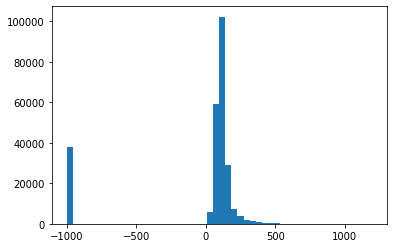

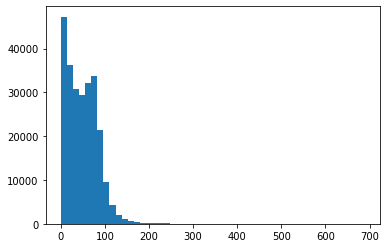

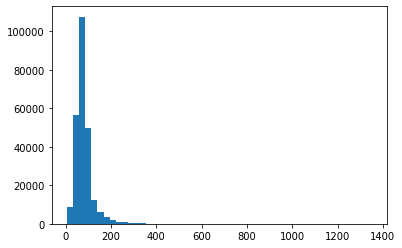

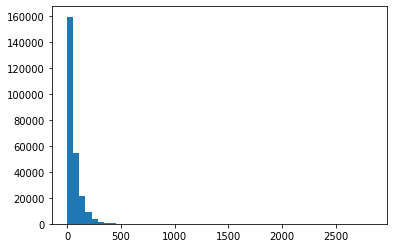

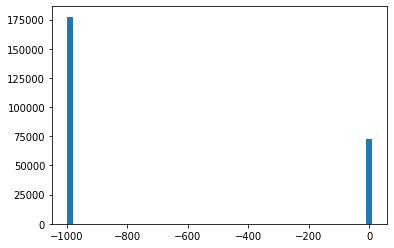

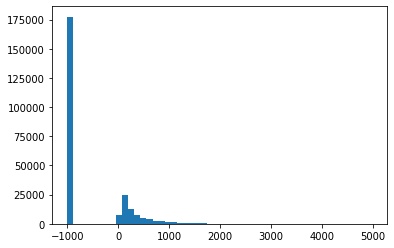

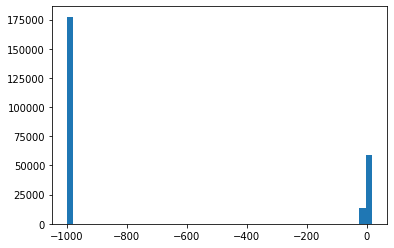

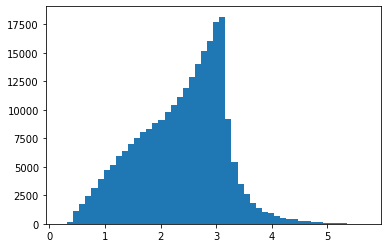

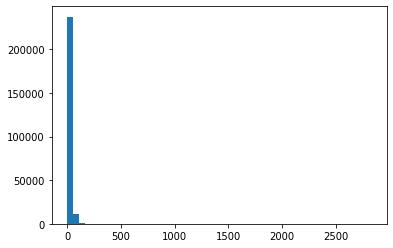

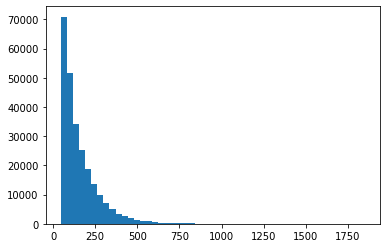

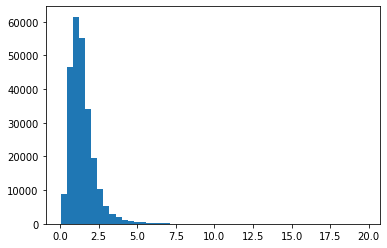

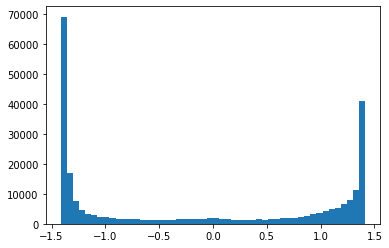

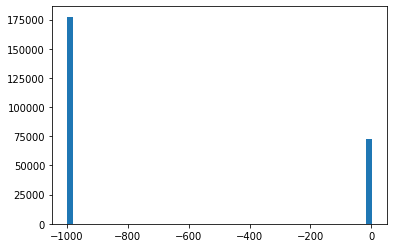

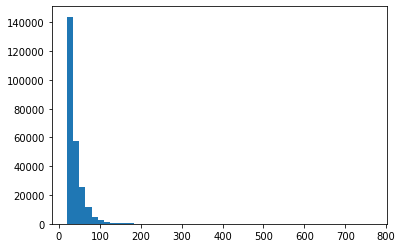

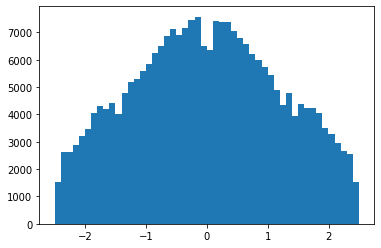

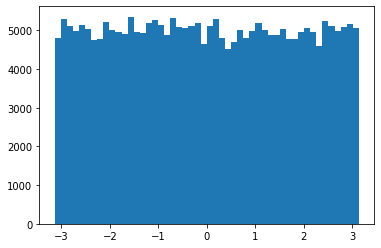

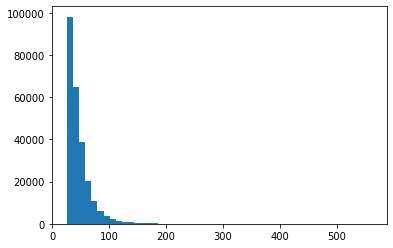

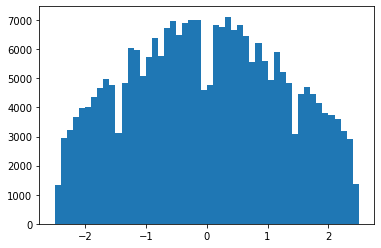

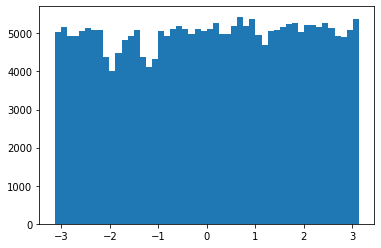

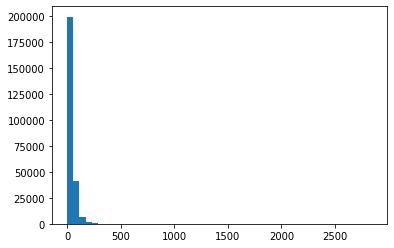

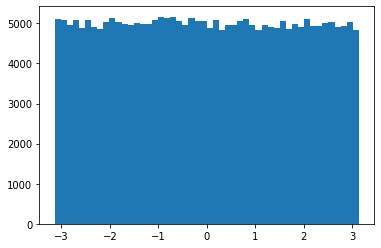

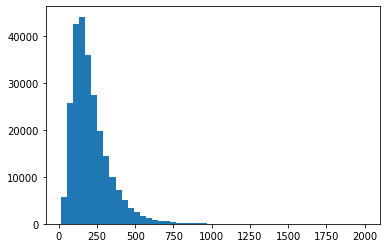

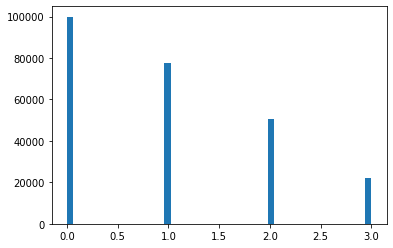

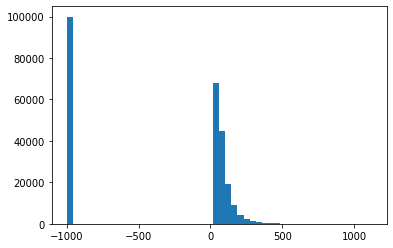

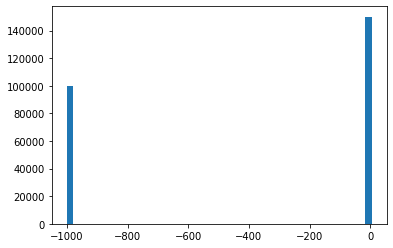

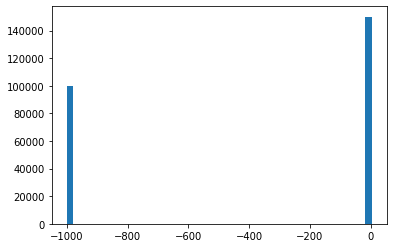

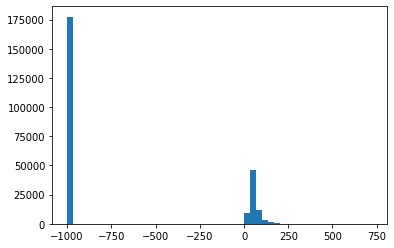

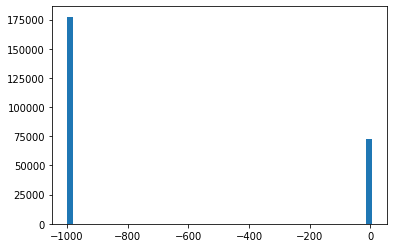

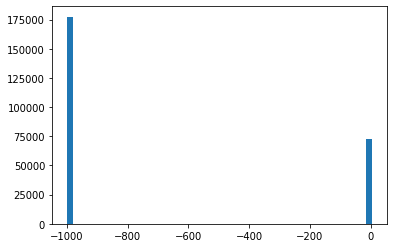

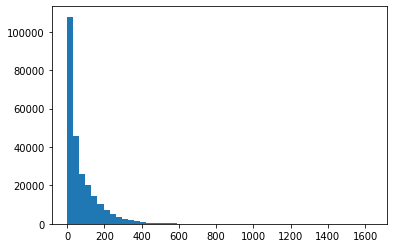

In [139]:
# Look at distribution of Train data
for i in range(tX.shape[1]):
    plt.figure()
    plt.hist(tX[:,i], bins = 50)
    plt.show()

In [21]:
tx = tX.copy() # Make a copy of train data

In [ ]:
# Below, remove outliers in train data

In [266]:
# IQR Method
q25, q75 = np.nanpercentile(tx, 25, axis=0), np.nanpercentile(tx, 75, axis=0)
iqr = q75 - q25
cut_off = iqr * 3 # Remove extreme value 
lower, upper = q25 - cut_off, q75 + cut_off

# Compare each row with lower & upper, for those < lower or > upper, 
outlier_index = []
for i in range(tx.shape[0]):
    if np.any(tx[i, :] < lower) or np.any(tx[i, :] > upper):
        outlier_index.append(i)

# Remove outlier
tx = np.delete(tx, outlier_index, axis = 0)
y = np.delete(y, outlier_index, axis = 0)

In [239]:
# Dealing with -999 below

In [22]:
# Replace -999.0 with mean of each column
tx = np.where(tx == -999, np.ma.array(tX, mask= (tX == -999)).mean(axis=0), tx) 

# Replace -999.0 with median of each column

# tx = np.where(tX != -999, tX, np.nan) # Replace -999 with nan
# col_median = np.nanmedian(tx, axis = 0) # Calculate median of each column
# inds_train = np.where(np.isnan(tx)) # find indices where nan value is present 
# replace inds with median of column 
# tx[inds_train] = np.take(col_median, inds_train[1]) # replace inds with median of column 


# Remove columns contain -999


# tx = tX[:, ~np.any(tX == -999, axis=0)]


# Remove columns with number of NaNs > 50%, then replace -999.0 with mean of each column


# remove_index = np.argwhere(np.count_nonzero(tX == -999, axis=0) > tX.shape[0]/2)
# tX2 = np.delete(tX, remove_index, 1)
# tx = np.where(tX2 == -999, np.ma.array(tX2, mask= (tX2 == -999)).mean(axis=0), tX2) 


# Extra code
# np.count_nonzero(tX == -999, axis=0)
# tx = np.where(tX != -999, tX, np.nan)  # Replace -999 with nan
# tx = np.where(np.isnan(tx2), np.ma.array(tx2, mask = np.isnan(tx2)).mean(axis=0), tx2)  # Replace nan with mean of each column

In [23]:
# Augment
degree = 3
tx = build_poly(np.transpose(tx), degree)

In [269]:
# Standardize data
tx = standardize(tx)
# Normalize data
tx = normalize(tx)

In [29]:
# GD
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.000000000000000000001

# Initialization
w_initial = np.zeros(tx.shape[1])
# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx.A, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

weights_sd = gradient_ws[-1] # Weights for gd
print(weights_sd) 
print(gradient_losses[-10:-1]) # Show changes in losses

Gradient Descent: execution time=77.290 seconds
[-3.18059823e-19 -3.82053900e-17 -2.74049807e-17 -2.63469419e-17
 -6.98792086e-18 -6.08059196e-19 -8.54760772e-17 -2.40979139e-20
 -7.44285022e-19 -6.34574279e-18 -3.39646856e-17 -6.13682836e-19
  3.46347170e-19 -1.11321014e-19 -7.34171052e-18  2.43305829e-21
 -5.05979419e-21 -1.55273226e-17  7.95525677e-21 -6.68118569e-21
 -1.26420678e-17  1.59893675e-20 -5.08061348e-17 -1.90101092e-19
 -2.32136063e-17  1.54540710e-21  3.72443785e-21 -1.85893978e-17
  4.31938364e-21 -2.81523731e-21 -1.10956512e-17 -6.86961478e-15
 -2.35543879e-15 -3.53561788e-15  1.39333021e-16 -9.32620653e-19
 -2.86133347e-15  9.80480095e-19 -2.03145603e-18 -2.44733627e-16
 -6.19233300e-15 -1.35588430e-18 -4.29358081e-19 -3.81328089e-20
 -1.31125098e-16 -6.38475389e-19 -1.05436597e-18 -9.20099929e-16
 -7.36078309e-19 -1.05812206e-18 -5.21181777e-16 -1.04604604e-18
 -1.22223692e-14 -3.97033441e-19 -1.91966816e-15 -2.37204700e-20
 -3.93715526e-19 -1.18830321e-15  1.253302

In [5]:
# SGD
# Define the parameters of the algorithm.
max_iters = 5000
gamma = 0.00000000000000000000001
batch_size = 1

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx.A, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

weights_sgd = sgd_ws[-1] # Weights for sgd
print(weights_sgd)
print(sgd_losses[-10:-1]) # Show changes in losses


NameError: name 'tx' is not defined

In [364]:
# LS
mse, weights_ls = least_squares(np.transpose(np.matrix(y)), tx)
print(mse, weights_ls)

[[0.30476523]] [[-2.69300017e+00]
 [ 1.23374288e-02]
 [-1.19965445e-02]
 [-1.34131475e-02]
 [ 1.27075737e-03]
 [-3.89427372e-01]
 [-9.95523757e-04]
 [-6.32913007e-02]
 [ 1.63255067e+00]
 [-1.49971397e-03]
 [-2.12874143e+00]
 [-4.15855438e-01]
 [-8.11797816e-02]
 [-3.68767084e-01]
 [ 2.14571035e+00]
 [-2.01158840e-03]
 [-4.25088427e-05]
 [ 2.14868432e+00]
 [ 1.24380764e-03]
 [ 2.92762117e-03]
 [-2.64650693e-03]
 [-2.47702531e-04]
 [ 1.31923423e-03]
 [ 1.90145433e-01]
 [ 5.95841766e-03]
 [-3.35377604e-03]
 [-3.32468651e-03]
 [ 4.28949209e-03]
 [ 8.91937501e-05]
 [-2.17450540e-03]
 [ 2.12817738e+00]
 [-4.08922145e-05]
 [ 5.94180231e-05]
 [ 2.60729824e-05]
 [ 7.61003453e-06]
 [ 1.48054805e-01]
 [ 6.56152200e-07]
 [ 2.72361728e-03]
 [-4.83314791e-01]
 [ 9.11640268e-06]
 [-1.79261435e-06]
 [ 6.68360843e-02]
 [ 2.97085075e-02]
 [ 1.41857133e+00]
 [-8.12379506e-05]
 [-2.28581725e-02]
 [-4.09534322e-04]
 [-9.43301632e-05]
 [-3.46639326e-02]
 [-8.47539181e-05]
 [ 1.29703273e-05]
 [-2.48489259e-0

In [365]:
# RG
lambda_ = 1
mse, weights_rg = ridge_regression(np.transpose(np.matrix(y)), tx, lambda_)
print(mse, weights_rg)

[[0.32186938]] [[-4.29884629e-03]
 [ 9.91627707e-03]
 [-1.45013311e-02]
 [-1.21861641e-03]
 [-9.83144753e-04]
 [-5.05368030e-03]
 [-6.29400019e-04]
 [-7.35616079e-03]
 [ 3.44018451e-03]
 [-5.43117392e-04]
 [ 2.54822835e-03]
 [-6.05172332e-03]
 [ 1.02283620e-02]
 [ 3.53828615e-03]
 [ 1.29397025e-02]
 [-4.09710347e-04]
 [-5.76277017e-04]
 [-9.31061148e-03]
 [-8.51459422e-05]
 [ 5.21287816e-04]
 [-3.35652268e-03]
 [ 2.93613542e-04]
 [-2.54690596e-04]
 [-7.00077934e-03]
 [ 2.86087910e-03]
 [-6.50046520e-04]
 [-3.42825575e-04]
 [-1.50541621e-02]
 [ 4.19160250e-05]
 [-2.12032695e-04]
 [-1.08065966e-03]
 [-3.43145644e-05]
 [ 6.73391332e-05]
 [-7.41716714e-06]
 [ 1.09455128e-05]
 [-1.07913076e-03]
 [ 7.35913461e-07]
 [-4.34398662e-03]
 [ 1.23888022e-02]
 [-7.45611057e-07]
 [ 2.28766519e-06]
 [-5.26125370e-03]
 [ 8.20251761e-03]
 [ 4.55618561e-03]
 [-7.57614572e-05]
 [-1.92568262e-02]
 [-6.51331628e-03]
 [ 7.45860279e-05]
 [-2.88911293e-02]
 [-7.37106447e-03]
 [ 2.62944490e-05]
 [-5.50447819e-0

## Generate predictions and save ouput in csv format for submission:

In [340]:
# Use your own path here!
DATA_TEST_PATH = '/Users/jiaanzhu/Desktop/MLProject1/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

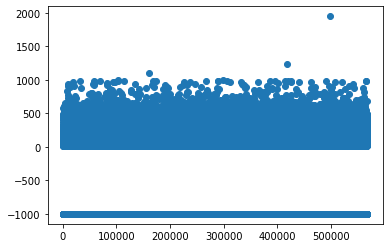

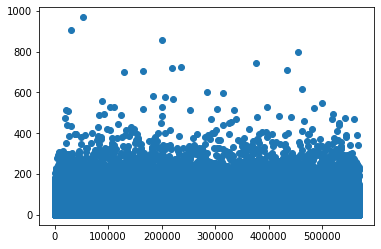

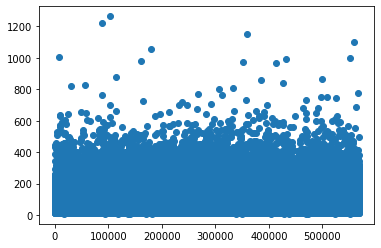

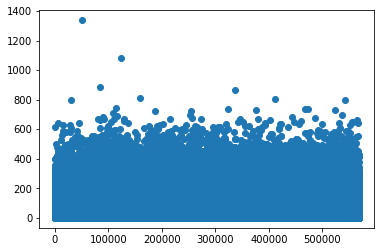

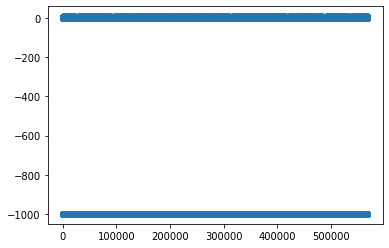

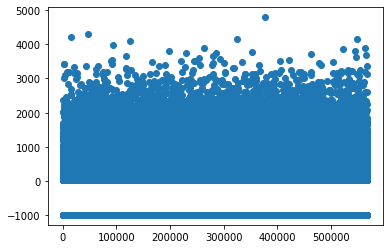

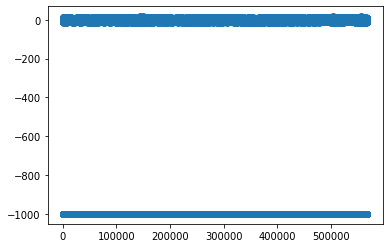

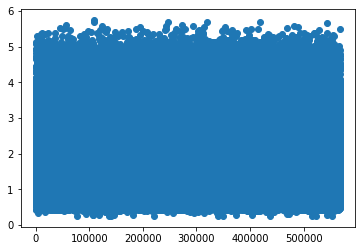

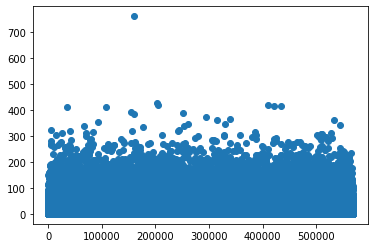

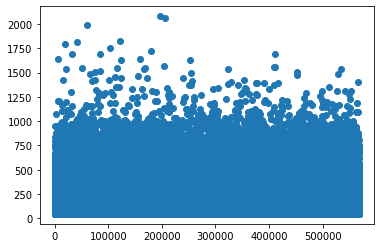

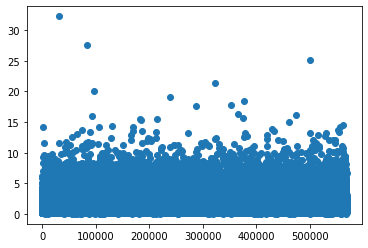

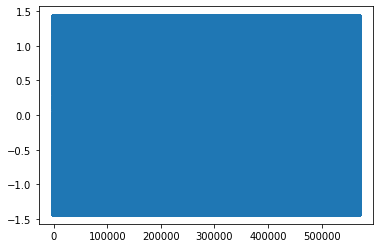

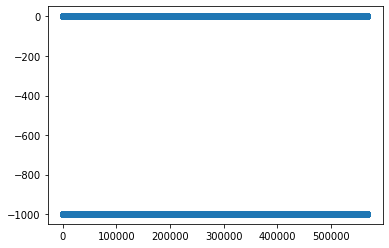

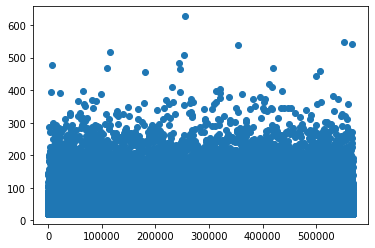

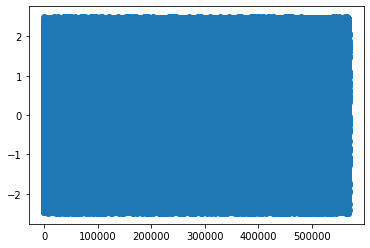

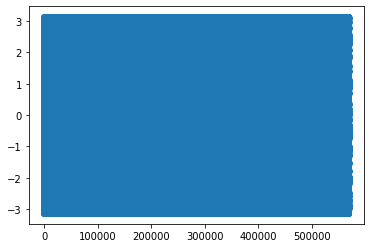

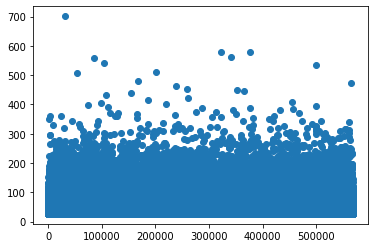

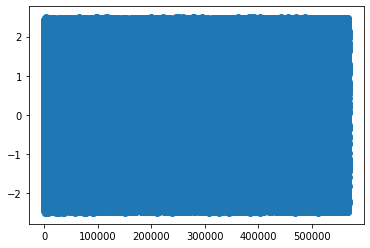

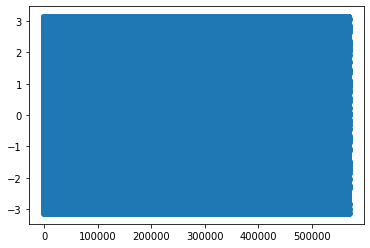

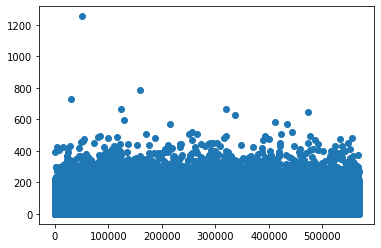

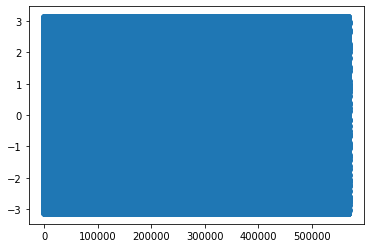

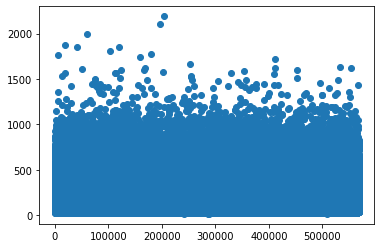

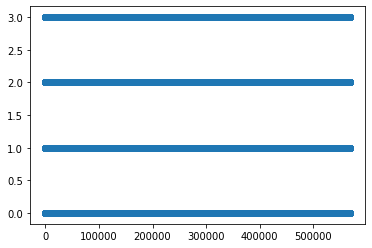

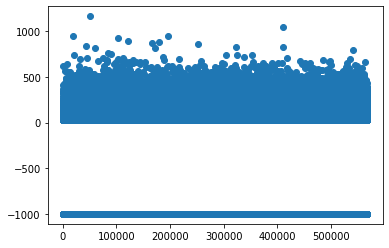

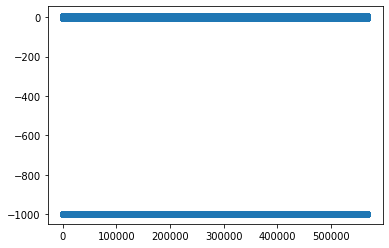

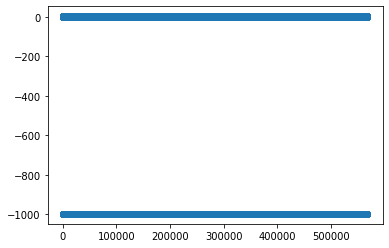

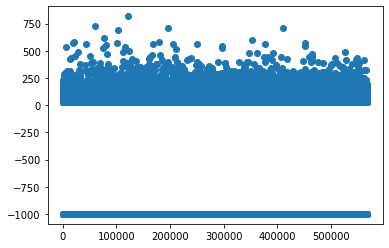

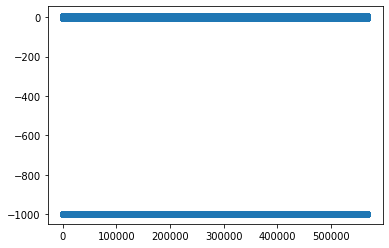

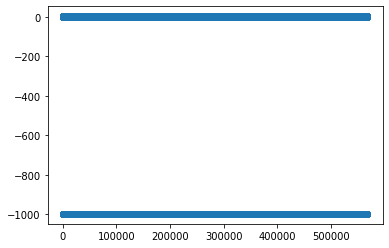

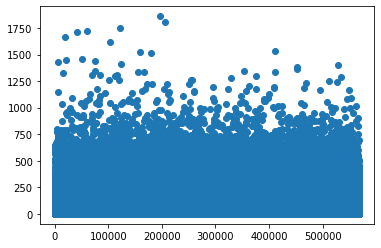

In [282]:
for i in range(tX_test.shape[1]):
    plt.figure()
    plt.scatter(range(tX_test.shape[0]), tX_test[:,i])
    plt.show()

In [341]:
# make a copy
# tx_test = tX_test[:, ~np.any(tX_test == -999, axis=0)]
tx_test = tX_test.copy()

In [342]:
# Replace -999.0 with mean of each column
tx_test = np.where(tx_test == -999, np.ma.array(tX, mask= (tX == -999)).mean(axis=0) , tx_test) 
# tX_test = np.delete(tX_test, remove_index, 1)
# tx_test = tX_test.copy() # Make a copy
# Replace -999 with nan
# tx_test = np.where(tx_test != -999, tx_test, np.nan)
# find indices where nan value is present
# inds_test = np.where(np.isnan(tx_test))
# replace inds with avg of column 
# tx_test[inds_test] = np.take(col_median, inds_test[1])

# Remove columns contain -999
# tx_test = tX_test[:, ~np.any(tX_test == -999, axis=0)]

In [343]:
# Augment test data
tx_test = build_poly(np.transpose(tx_test), degree)

In [277]:
# Standardize test data
tx_test = standardize(tx_test)
# Normalize test data
tx_test = normalize(tx_test)

In [344]:
# Use your own path here!
OUTPUT_PATH = '/Users/jiaanzhu/Desktop/MLProject1/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights_ls, tx_test) # Use deifferent weights here
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
'''
Test codes below
'''

In [20]:
np.nanmin(tx, axis=0)

array([  9.044,   0.   ,   6.329,   0.   ,   0.   ,  13.602, -18.066,
         0.208,   0.   ,  46.104,   0.047,  -1.414,   0.   ,  20.   ,
        -2.499,  -3.142,  26.   ,  -2.505,  -3.142,   0.109,  -3.142,
        13.678,   0.   ,  30.   ,  -4.499,  -3.142,  30.   ,  -4.5  ,
        -3.142,   0.   ])

In [32]:
tx_test.shape

(568238, 30)

In [297]:
tX2.shape

(250000, 28)

In [193]:
tx = tX[:, ~np.any(tX == -999, axis=0)] # Remove columns contain -999

In [22]:
print(np.count_nonzero(y == 1)) 

85667


In [246]:
tx_test.shape

(568238, 30)

In [45]:
print(np.count_nonzero(inds == -999, axis=0)) 

0


In [225]:
np.count_nonzero(tx == ty)

7500000

In [293]:
np.count_nonzero(tX == -999, axis=0)

array([ 38114,      0,      0,      0, 177457, 177457, 177457,      0,
            0,      0,      0,      0, 177457,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,  99913,
        99913,  99913, 177457, 177457, 177457,      0])

In [294]:
np.count_nonzero(tX == -999, axis=0) > 125000

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False])

In [267]:
print(np.count_nonzero(tx_test == 2.4037350261224666, axis=0)) 

[     0      0      0      0 402796      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]


In [102]:
print(np.count_nonzero(tx == -999, axis=0)) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
inds

(array([     1,      1,      1, ..., 249999, 249999, 249999]),
 array([ 4,  5,  6, ..., 26, 27, 28]))

In [311]:
np.count_nonzero(tX == -999) > tX.shape[0]/2

True

In [333]:
tx_test.shape

(568238, 23)

In [55]:
# Initialising numpy array 
ini_array = np.array([[1.3, 2.5, 3.6, np.nan],  
                      [2.6, 3.3, np.nan, 5.5], 
                      [2.1, 3.2, np.nan, 6.5],
                      [1.0, 2.0, np.nan, 4.0]]) 
  
# printing initial array 
print ("initial array", ini_array) 
  
# column mean 
col_median = np.nanmedian(ini_array, axis = 0) 
  
# printing column mean 
print ("columns median", str(col_mean)) 
  
# find indices where nan value is present 
inds = np.where(np.isnan(ini_array)) 
  
# replace inds with avg of column 
ini_array[inds] = np.take(col_median, inds[1]) 
  
# printing final array 
print ("final array", ini_array) 

initial array [[1.3 2.5 3.6 nan]
 [2.6 3.3 nan 5.5]
 [2.1 3.2 nan 6.5]
 [1.  2.  nan 4. ]]
columns median [2.  3.  4.5 6. ]
final array [[1.3 2.5 3.6 5.5]
 [2.6 3.3 3.6 5.5]
 [2.1 3.2 3.6 6.5]
 [1.  2.  3.6 4. ]]
